### Tema 4. Capturando Datos desde APls

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install facebook-sdk

In [3]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import requests
import facebook

In [5]:
miurl="https://data.seattle.gov/resource/kzjm-xkqj.json"
mifichero=requests.get(miurl)

In [6]:
type(mifichero)

requests.models.Response

In [7]:
print(mifichero.status_code)

200


In [8]:
if mifichero.status_code==200:
    data911=mifichero.json()

In [9]:
data911[1:3]

[{'address': '9610 53rd Av S',
  'type': 'Aid Response',
  'datetime': '2019-05-22T12:55:00.000',
  'latitude': '47.515984',
  'longitude': '-122.266529',
  'report_location': {'type': 'Point',
   'coordinates': [-122.266529, 47.515984]},
  'incident_number': 'F190051946',
  ':@computed_region_ru88_fbhk': '52',
  ':@computed_region_kuhn_3gp2': '46',
  ':@computed_region_q256_3sug': '18800'},
 {'address': '106 Pike St',
  'type': 'Aid Response',
  'datetime': '2019-05-22T12:57:00.000',
  'latitude': '47.608849',
  'longitude': '-122.339945',
  'report_location': {'type': 'Point',
   'coordinates': [-122.339945, 47.608849]},
  'incident_number': 'F190051950',
  ':@computed_region_ru88_fbhk': '14',
  ':@computed_region_kuhn_3gp2': '30',
  ':@computed_region_q256_3sug': '18081'}]

In [10]:
data911DF=pd.DataFrame(data911)
data911DF.head()

,address,type,datetime,latitude,longitude,report_location,incident_number,:@computed_region_ru88_fbhk,:@computed_region_kuhn_3gp2,:@computed_region_q256_3sug,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94
0,904 7th Av,Car Fire,2019-05-22T12:55:00.000,47.6069,-122.329051,"{'type': 'Point', 'coordinates': [-122.329051,...",F190051945,19,12,18379,NaN,NaN
1,9610 53rd Av S,Aid Response,2019-05-22T12:55:00.000,47.515984,-122.266529,"{'type': 'Point', 'coordinates': [-122.266529,...",F190051946,52,46,18800,NaN,NaN
2,106 Pike St,Aid Response,2019-05-22T12:57:00.000,47.608849,-122.339945,"{'type': 'Point', 'coordinates': [-122.339945,...",F190051950,14,30,18081,NaN,NaN
3,1902 2nd Av,Aid Response,2019-07-01T07:45:00.000,47.610972,-122.340465,"{'type': 'Point', 'coordinates': [-122.340465,...",F190068848,5,30,18081,NaN,NaN
4,4737 Roosevelt Way Ne,Unk Odor,2019-07-01T07:45:00.000,47.663338,-122.317421,"{'type': 'Point', 'coordinates': [-122.317421,...",F190068849,60,38,18383,NaN,NaN


In [11]:
#Sólo se ha estraido 1000 observaciones dado que es la capacidad maxima para usuario sin cuenta
data911DF.shape

(1000, 12)

### Facebook API

In [12]:
import facebook
import pandas as pd

In [14]:
token_dec = 'EAACGiHFAThoBAL0CpHo60wfjHOW0YOymwNZBpqnO8NRiszAWb8ZCvUYJuDobCr9BloRWhV9F0EJDycaJRk0yfha7VF4vceUjPmW1EWe81UJhiwHGo3BiTvd9NZCtEXYd4dNwmiI1eeNyw4YaBinLxgQQ30UfCnv6VTkgBDLXmtBHnWLrHU5dmCMcyvs9d866bApr8CujlKw3dqhuEZAgZAKL9v1G9VOAZAqZBvoBGZCgTQZDZD'
page_id = '522721131191656'
page_name = 'Social Data Consulting'
graph=facebook.GraphAPI(access_token=token_dec, 
                        version=version_api)


posts = graph.get_connections(page_id,
                              'posts',
                              limit='99',
                              since='2019-07-01',
                              until='2019-08-15',
                              fields='message,caption,story,created_time,id.as(post_id),description,type,icon,link,permalink_url,picture,full_picture,shares,source,reactions.type(LIKE).limit(0).summary(total_count).as(like),reactions.type(WOW).limit(0).summary(total_count).as(wow),reactions.type(SAD).limit(0).summary(total_count).as(sad),reactions.type(ANGRY).limit(0).summary(total_count).as(angry),reactions.type(LOVE).limit(0).summary(total_count).as(love),reactions.type(HAHA).limit(0).summary(total_count).as(haha),comments.limit(0).summary(total_count)')
posts = posts['data']
post_bench=pd.DataFrame(posts, 
                        columns=['message','created_time','post_id','type','icon','link','permalink_url','picture','full_picture','shares','like','wow','sad','angry','love','haha','comments'])

GraphAPIError: (#100) Pages Public Content Access requires either app secret proof or an app token

In [15]:
post_bench.head(5)

NameError: name 'post_bench' is not defined

### API Twitter

In [16]:
import tweepy
from tweepy import OAuthHandler

In [17]:
#Recovering security info:
consumer_key = 'eMcnfrsrAgghHJCCBdP8QStYj'
consumer_secret = 'M2FwH7ARB8MK6hq0n8HTrVErWanAsTST0nkmw11VfvuMjn8fel'
access_token = '587863980-j6aJNJaXotnCuYF5rBZ8myUYF8kCet61E5sgWWHC'
access_token_secret = 'TbSQ6OVufSk0LH6iiRpSAJBwffggEOR2Ah1ToXRQghRIV'


In [18]:
help(tweepy.API)

Help on class API in module tweepy.api:

class API(builtins.object)
 |  API(auth_handler=None, host='api.twitter.com', search_host='search.twitter.com', upload_host='upload.twitter.com', cache=None, api_root='/1.1', search_root='', upload_root='/1.1', retry_count=0, retry_delay=0, retry_errors=None, timeout=60, parser=None, compression=False, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, proxy='')
 |  
 |  Twitter API
 |  
 |  Methods defined here:
 |  
 |  __init__(self, auth_handler=None, host='api.twitter.com', search_host='search.twitter.com', upload_host='upload.twitter.com', cache=None, api_root='/1.1', search_root='', upload_root='/1.1', retry_count=0, retry_delay=0, retry_errors=None, timeout=60, parser=None, compression=False, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, proxy='')
 |      API instance constructor
 |      
 |      :param auth_handler:
 |      :param host: url of the server of the rest api,
 |                   default: 'api.twitter.co

In [19]:
# using security info:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, 
               wait_on_rate_limit=True,
               wait_on_rate_limit_notify=True,
               parser=tweepy.parsers.JSONParser())

In [20]:
# getting the tweets from a user:

tweets = api.user_timeline(screen_name = 'MashiRafael', #cuenta
                           count = 1000, #número de tweets 
                           include_rts = True) #True: incluye rts

In [21]:
tweets

[{'created_at': 'Wed Feb 10 15:59:14 +0000 2021',
  'id': 1359532385541316608,
  'id_str': '1359532385541316608',
  'text': '¡Chuta!\n¡También ha sido culpa de Correa!😂😂😂 https://t.co/rbdFKNf1qA',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/rbdFKNf1qA',
     'expanded_url': 'https://www.eldiario.es/politica/candidato-indigena-acusa-correa-meter-mano-elecciones-ecuador_1_7206778.html',
     'display_url': 'eldiario.es/politica/candi…',
     'indices': [45, 68]}]},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 209780362,
   'id_str': '209780362',
   'name': 'Rafael Correa',
   'screen_name': 'MashiRafael',
   'location': 'Ecuador',
   'description': 'Expresidente de la

In [22]:
type(tweets)

list

In [23]:
type(tweets[1])

dict

In [24]:
tweets[5]

{'created_at': 'Wed Feb 10 04:07:55 +0000 2021',
 'id': 1359353378434764802,
 'id_str': '1359353378434764802',
 'text': '😂 https://t.co/imrdxT0h0W',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1359353374966124547,
    'id_str': '1359353374966124547',
    'indices': [2, 25],
    'media_url': 'http://pbs.twimg.com/media/Et1ksT8VkAMQWSV.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/Et1ksT8VkAMQWSV.jpg',
    'url': 'https://t.co/imrdxT0h0W',
    'display_url': 'pic.twitter.com/imrdxT0h0W',
    'expanded_url': 'https://twitter.com/MashiRafael/status/1359353378434764802/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 680, 'h': 288, 'resize': 'fit'},
     'large': {'w': 1024, 'h': 433, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1024, 'h': 433, 'resize': 'fit'}}}]},
 'extended_entities': {'media': [{'id': 1359353374966124547,
    'id_str': '1

In [25]:
type(tweets[0])

dict

In [26]:
#Creamos el objeto
aTweet=tweets[0]
# que vaya navegando en todo aTweet
for field in aTweet.keys():
    print (field)

created_at
id
id_str
text
truncated
entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


In [27]:
#Ver el texto de tweet
aTweet['text']

'¡Chuta!\n¡También ha sido culpa de Correa!😂😂😂 https://t.co/rbdFKNf1qA'

In [28]:
#Ver la hora de publicacion del tweet
aTweet['created_at']

'Wed Feb 10 15:59:14 +0000 2021'

In [29]:
mitexto=[t['text'] for t in tweets]
mihora=[t['created_at'] for t in tweets]
correaTweets=pd.DataFrame({'content_Tweets':mitexto,
                           'Published_Time':mihora})
correaTweets.head()

,content_Tweets,Published_Time
0,¡Chuta!\n¡También ha sido culpa de Correa!😂😂😂 ...,Wed Feb 10 15:59:14 +0000 2021
1,RT @VieiraHerrera: Qué sentirá Lasso al ver qu...,Wed Feb 10 14:30:14 +0000 2021
2,"RT @pichinchauniver: 🔴#ATENCIÓN | ""¿Usted (@ma...",Wed Feb 10 14:08:52 +0000 2021
3,¡Ganamos! (Juan Cárdenas) | https://t.co/Z41fm...,Wed Feb 10 13:57:33 +0000 2021
4,RT @ecuarauz: Siempre lo dije: enfrentaremos e...,Wed Feb 10 12:46:20 +0000 2021


In [30]:
correaTweets.shape

(200, 2)

## Tema 5. Entendimiento de datos

In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt #Librería Gráfica
import seaborn as sns #Librería Gráfica
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #Particionamiento de Datos
from sklearn.preprocessing import LabelEncoder #Para codificador de etiquetas.
from collections import defaultdict #Para un valor de diccionario por defecto.

In [3]:
#Mi directorio actual - current work directory
os.getcwd()

'C:\\Users\\user'

In [4]:
#Cambiando mi directorio de trabajo
os.chdir(r"E:\PYTHOM\MODULO 1\CLASE 4")

In [5]:
FileCSV="MarketingDirecto.csv"
mark=pd.read_csv(FileCSV,  #ruta del archivo
                 sep=',')  #separador de atributo que usa el fichero csv
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [6]:
#VEAMOS LA INFORMACION EN GENERAL
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  697 non-null    object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
#En otras palabra a mi Data Frame le preguntamos que en cada celda  hay valores nulos o no
#para ello usamos el método .isnull()
mark.isnull()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,True,False,False
996,False,False,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
#Mostrar en qué columna existe al menos un error
mark.isnull().any()

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial     True
Catalogos    False
Monto        False
dtype: bool

In [9]:
#Controlando los valores nulos
#Muestra si existe al menos un valor nulo en toda la data
mark.isnull().any().any()

True

In [10]:
#Calculando el valor porcentual de nulos por variable
#Para ello usaremos el metodo sum() paar sumar todos los valores nulos y lo dividimos entre la cantidad
#total de toda la Data Frame
mark.isnull().sum()/len(mark)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [11]:
#Creando una nueva columna que identifique en que filas existe un NA
mark["ValorNulo"]=mark["Historial"].isnull()

In [12]:
#Mostramos
mark.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495,False
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782,False
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155,False
8,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158,False
9,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034,True


In [13]:
#Revisando el tipo de variables de nuestro DF
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  697 non-null    object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
 10  ValorNulo  1000 non-null   bool  
dtypes: bool(1), int64(4), object(6)
memory usage: 79.2+ KB


In [14]:
#Eliminando filas con valores nulos...se debe debatir
mark2=mark.loc[mark.ValorNulo==False]
mark2.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495,False
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782,False
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155,False
8,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158,False
11,Media,Masculino,Propia,Casado,Lejos,111800,3,Alto,18,2065,False


In [15]:
print(mark.shape)
print(mark2.shape)

(1000, 11)
(697, 11)


In [16]:
filecsv="MarketingDirecto.csv"
mark=pd.read_csv(filecsv,sep=",")
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [17]:
mark.columns.to_list()

['Edad',
 'Genero',
 'Vivienda',
 'Ecivil',
 'Ubicacion',
 'Salario',
 'Hijos',
 'Historial',
 'Catalogos',
 'Monto']

In [18]:
mark.dtypes

Edad         object
Genero       object
Vivienda     object
Ecivil       object
Ubicacion    object
Salario       int64
Hijos         int64
Historial    object
Catalogos     int64
Monto         int64
dtype: object

In [19]:
#Calculo el Nro. de variables por tipo
#.to_series():todas las series
#.groupby(objeto.dtypes): agrupando por su tipo de variable
#size():Para ver el tamaño
mark.columns.to_series().groupby(mark.dtypes).size()

int64     4
object    6
dtype: int64

In [20]:
#Agrupando las variables por su tipo.
#.groupby(objeto.dtypes): agrupando por su tipo de variable
#groups: agrupar
#Lo almacenamos en el objeto tipo
tipos = mark.columns.to_series().groupby(mark.dtypes).groups
tipos

{int64: ['Salario', 'Hijos', 'Catalogos', 'Monto'], object: ['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']}

In [21]:
#Armando lista de columnas categóricas
#creamos la columna categórica
colcat = tipos[np.dtype('object')].to_list()
#usamos el metodo len(objeto a analizar): nos da la cantidad de elementos de ste objeto
#Mostramos
print(len(colcat))  # cantidad de columnas con datos categóricos. 
print(colcat)

#Armando lista de columnas numéricas
colnum = tipos[np.dtype('int64')].to_list()
print(len(colnum))  # cantidad de columnas con datos numéricas. 
print(colnum)

6
['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']
4
['Salario', 'Hijos', 'Catalogos', 'Monto']


In [22]:
#Completando los valores faltantes para variables numéricas.
for num in colnum:
    #Vamos a guardar la media en el objeto media y se utilizara el metodo .mean()
    media=mark[num].mean()
    #Vamos rellenar a los elementos vacios por la media para eso utilizaremos el 
    #método .fillna(el valor que quieres almacenar)
    mark[num]=mark[num].fillna(media)

In [23]:
#Completando los valores faltantes para variables categóricas.
for cat in colcat:
     #Vamos a guardar la moda en el objeto moda y se utilizara el metodo .mode()
    moda=mark[cat].mode()[0]
    #Vamos rellenar a los elementos vacios por la moda para eso utilizaremos el 
    #método .fillna(el valor que quieres almacenar)
    mark[cat]=mark[cat].fillna(moda)

In [24]:
mark.isnull().sum()/len(mark)*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

In [25]:
#Verificación de la data limpia de NAs
mark.isnull().any().any()

False

In [26]:
#Verificando el valor porcentual de nulos por variable
mark.isnull().mean()*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

In [27]:
# Guardando el dataset preprocesado
# mark.to_csv("mark_procesado.csv", index=False)

#### _Interactuando con una Variable Cualitativa_

In [28]:
#Contabizando frecuencias absolutas de una variable
civil_freq=pd.value_counts(mark.Ecivil)
civil_freq

Casado     502
Soltero    498
Name: Ecivil, dtype: int64

In [29]:
civil_freq2=mark.groupby("Ecivil").size()
civil_freq2

Ecivil
Casado     502
Soltero    498
dtype: int64

In [30]:
#Verificando los tipos de objetos
print(type(civil_freq))
print(type(civil_freq2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Gráfico de Pie (Sectores)

In [31]:
civil_freq[0]/civil_freq.sum()*100

50.2

In [32]:
str(round(civil_freq[0]/civil_freq.sum()*100,1))+"%"

'50.2%'

In [33]:
#Ejemplificando la primera etiqueta
print(civil_freq[0])
str(round((civil_freq[0]/civil_freq.sum())*100,1))+"%" 

502


'50.2%'

In [34]:
labels= [str(round((x/civil_freq.sum())*100,1))+"%" for x in civil_freq]
labels

['50.2%', '49.8%']

In [35]:
labels[0] ="Casado " + labels[0]
labels[1] ="Soltero " + labels[1]

In [36]:
labels

['Casado 50.2%', 'Soltero 49.8%']

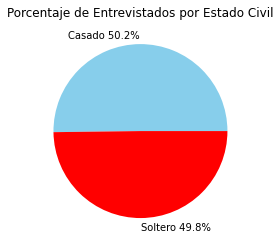

In [37]:
plt.pie(civil_freq,labels=labels,colors=['skyblue','red'])
plt.title("Porcentaje de Entrevistados por Estado Civil",loc='center')
plt.show()

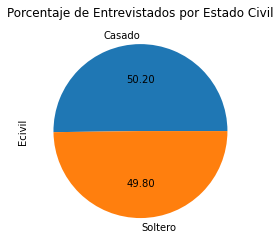

In [38]:
#Método Alternativo
civil_freq.plot(kind='pie', autopct='%.2f',
                title='Porcentaje de Entrevistados por Estado Civil',)
plt.show()

## Gráfico de Barra

In [39]:
#Categorizando la variable Salario
#bins no toma los extremos.
#cut(): te permite crear intervalos
mark['salario_cat']=pd.cut(mark.Salario,bins=[mark.Salario.min()-1,30000,100000,mark.Salario.max()+1])
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,salario_cat
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,"(30000, 100000]"
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,"(30000, 100000]"
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,"(10099, 30000]"
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,"(30000, 100000]"
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,"(30000, 100000]"


In [40]:
pd.value_counts(mark.salario_cat)

(30000, 100000]     653
(10099, 30000]      250
(100000, 168801]     97
Name: salario_cat, dtype: int64

<AxesSubplot:title={'center':'Frecuencia por Salarios Discretizados'}>

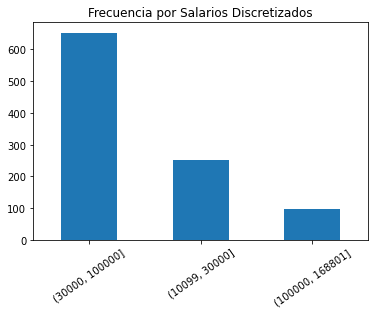

In [41]:
#Creando el grafico de barras desde pandas
#Para este gráfico se utilizará el objeto plot.
plot = pd.value_counts(mark.salario_cat).plot(kind='bar',
                                      title='Frecuencia por Salarios Discretizados', 
                                      rot=35)
plot

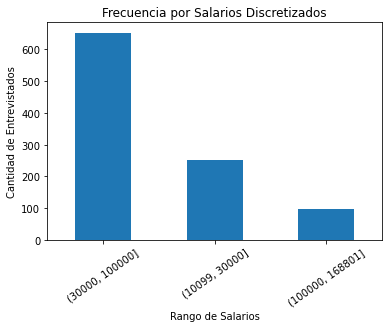

In [42]:
#Creando el grafico de barras desde pandas
#Para este gráfico se utilizará el objeto plot.
plot = pd.value_counts(mark.salario_cat).plot(kind='bar',
                                      title='Frecuencia por Salarios Discretizados', 
                                      rot=35)
#Usamos el metodo .set_ylabel(): establecer etiquetas en el eje Y
plot.set_ylabel('Cantidad de Entrevistados')
##Usamos el metodo .set_ylabel(): establecer etiquetas en el eje X
plot.set_xlabel('Rango de Salarios')
plt.show()

In [43]:
#help(pd.value_counts(mark.salario_cat).plot)

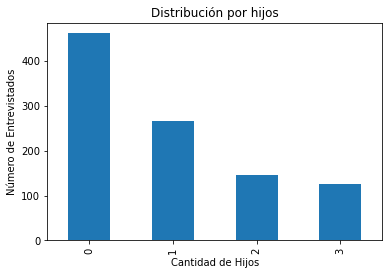

In [44]:
# Grafico de Barra para el número de hijos.
mark.groupby('Hijos').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Número de Entrevistados')
plt.show()

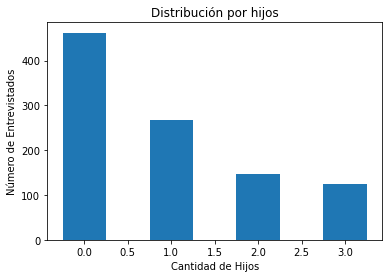

In [45]:
#Forma Alternativa mediante matplotlib
fig,ax=plt.subplots()
ax.bar(mark.groupby('Hijos').size().index,mark.groupby('Hijos').size(),width=0.5)
plt.title('Distribución por hijos')
plt.ylabel("Número de Entrevistados")
plt.xlabel("Cantidad de Hijos")
plt.show()

## Gráfico de Boxplot

In [46]:
#La versión del seaborn nos arrojará un warning
import warnings
warnings.filterwarnings("ignore")

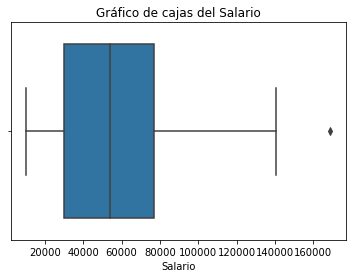

In [47]:
#Se utilizará el gráfico Boxplot de la librería seaborn (sns)
sns.boxplot(mark.Salario)
plt.title("Gráfico de cajas del Salario")
plt.show()

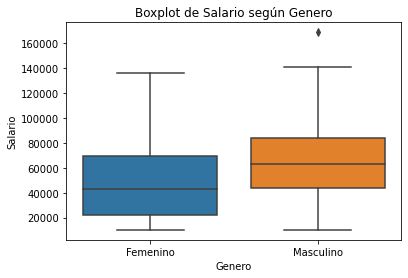

In [48]:
sns.boxplot(x=mark['Genero'] #Será la variable categorizadora o separadora.
            ,y=mark['Salario']) #La variable cuantitativa de rpta.
plt.title("Boxplot de Salario según Genero")
plt.show()

In [49]:
# Mediama de sueldo por mujeres
mark[mark.Genero == 'Femenino'].Salario.median()

42650.0

In [50]:
# Mediana de sueldo por hombres
mark[mark.Genero == 'Masculino'].Salario.median()

62800.0

## Gráfico de Histograma

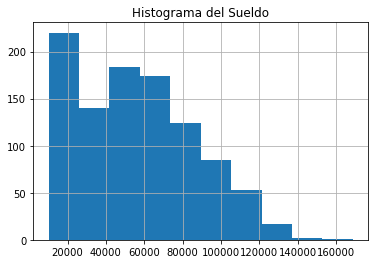

In [51]:
#Histogramas para la variable cuantitativa Salario
mark.Salario.hist()
plt.title('Histograma del Sueldo')
plt.show()

## Gráfico de Dispersión

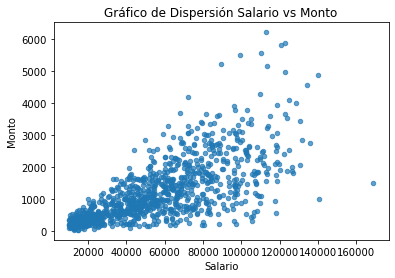

In [52]:
mark.plot.scatter(x="Salario",
                 y="Monto",
                 alpha=0.7) #sombreado de los puntos, menor valor es más claro.
plt.title("Gráfico de Dispersión Salario vs Monto")
plt.show()

## Grafica de Dispersión por partes

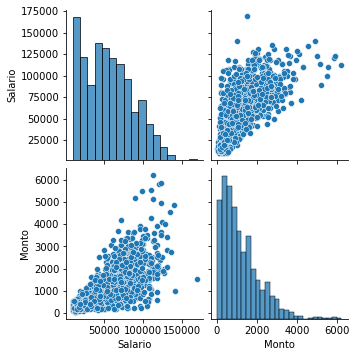

In [53]:
#Gráfico de Dispersión por pares.
cols = ['Salario', 'Monto']
sns.pairplot(mark[cols], #data y sus columnas seleccionadas
             height = 2.5) #tamaño de la gráfica
plt.show()

## Codificación y Partición de Datos

**Descripción:** Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

**Variables de entrada:**

**Datos del cliente bancario:**

   1 - age :edad del cliente (numérico)
   
   2 - job: tipo de trabajo (categórico: "administrador", "desconocido", "desempleado", "gerencia", "empleada doméstica", "empresario", "estudiante",
                                       "obrero", "autónomo", "jubilado", "técnico", "servicios")
                                       
   3 - marital: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
   
   4 - education :educacion del cliente (categórica: "desconocido", "secundario", "primario", "terciario")
   
   5 - default: incumplimiento del cliente ¿tiene crédito en incumplimiento? (binario: "sí", "no")
   
   6 - balance: saldo medio anual, en euros (numérico)
   
   7 - housing: tiene préstamo de vivienda? (binario: "sí", "no")
   
   8 - loan: tiene préstamo personal? (binario: "sí", "no")
   
**relacionado con el último contacto de la campaña actual:**

   9 - contact: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
   
  10 day: último día de contacto del mes (numérico)
  
  11 month: último contacto del mes del año (categórico: "ene", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: duración del último contacto, en segundos (numérico)
  
**otros atributos:**

  13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
  
  14 pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
  
  15 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

**Variable de salida (objetivo deseado):**

  17 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "sí", "no")

In [54]:
FileCSV="bank.csv"
df_bank=pd.read_csv(FileCSV,sep=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [55]:
from collections import defaultdict #Para generar un diccionario por defecto
from sklearn.preprocessing import LabelEncoder  #Para Codificar una variable

## Entendiendo el preprocessing.LabelEncoder

In [56]:
#Clase LabelEnconder del Modulo preprocessing de la libreria skiearn
#encoder: codificador
encoder=LabelEncoder()
#.fit():Pra ajustar datos, es decir, aprender datos
encoder.fit(['Soltero','Soltero','Casado','Viudo','Divorciado','Divorciado'])
#El atributo classes_ permite visualizar las categorías obtenidas en el ajuste.
print(encoder.classes_)

['Casado' 'Divorciado' 'Soltero' 'Viudo']


In [57]:
#Ahora podemos codificar o transformar con el ajuste obtenido para nuevos valores
encoder.transform(['Soltero','Viudo','Viudo','Soltero','Divorciado'])

array([2, 3, 3, 2, 1], dtype=int64)

In [58]:
#Si tuviésemos lo números podríamos aplicar la transformación inversa.
encoder.inverse_transform([2,1,2,1,0,0])

array(['Soltero', 'Divorciado', 'Soltero', 'Divorciado', 'Casado',
       'Casado'], dtype='<U10')

## Entendiendo el defaultdict

In [59]:
versiones_lenguajes=defaultdict(lambda: '1.0.0') #El elemento del diccionario por defecto será 1.0.0
versiones_lenguajes['Java']='12.0.0'
versiones_lenguajes['PHP']='7.1.2'
versiones_lenguajes['C#']='7.0.0'

print(versiones_lenguajes)
versiones_lenguajes['Python'] #OJO: No le ingreso valor
versiones_lenguajes

defaultdict(<function <lambda> at 0x000001F5BF03D040>, {'Java': '12.0.0', 'PHP': '7.1.2', 'C#': '7.0.0'})


defaultdict(<function __main__.<lambda>()>,
            {'Java': '12.0.0',
             'PHP': '7.1.2',
             'C#': '7.0.0',
             'Python': '1.0.0'})

In [61]:
d=defaultdict(LabelEncoder)
#Con el código anterior aseguro que cualquier valor del dicionario d sea: preprocessing.LabelEncoder
print(type(d))
print(d['job'])
print(d['marital'])

<class 'collections.defaultdict'>
LabelEncoder()
LabelEncoder()


In [62]:
#Almecenamos variables por tipo
tipos=df_bank.columns.to_series().groupby(df_bank.dtypes).groups
tipos

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']}

In [63]:
#Extraemos una lista que contenga sólo las columnas de tipo object (las que no son numéricas)
list_text=list(tipos[np.dtype('object')])
list_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [73]:

####Forma Clásica####
def sumatoria(x,y):
    return(x+y)

####Lambda Anónima####
suma=lambda x,y:x+y

In [64]:
#lambda x: d[x.name].fit_transform(x) if x.name in list_text else x
#Solo se aplica d[x.name].fit_transform(x) la transformacion 
#si el nombre se encuentra en la lista(if x.name in list_text)
#de lo contrario no se realiza ninguna transformacion(x)
#fit: realiza un aprendizaje de las categorías ajustando a los datos encontrados.
# Codificar las variables
fit=df_bank.apply(lambda x: d[x.name].fit(x) if x.name in list_text else x)
#transform ejecuta
df_bank2=df_bank.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [65]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
list(d["y"].classes_) #Las categorías encontradas en la variable y

['no', 'yes']

In [67]:
list(d["y"].transform(list(d["y"].classes_))) #Las recategorizaciones transformadas.

[0, 1]

In [68]:
####################################################
#############PARTICIONAMIENTO DE DATOS##############
from sklearn.model_selection import train_test_split

In [69]:
x=df_bank2.iloc[:,0:len(df_bank.columns)-1].values
y=df_bank2.iloc[:,len(df_bank.columns)-1].values
x,y
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(x, #Matriz de Datos
                                           y, #Variable Target
                                           test_size=0.3, #Proporción de Testeo
                                           random_state=2021, #Semilla
                                           stratify=y) #Criterio de Estratificación

In [71]:
len(df_bank2.index)

4521

In [72]:
print(len(xtest))
print(len(xtrain))

1357
3164
